In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np

In [2]:
sns.set_theme(style="whitegrid")
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")

## Addition

In [3]:
adder_df = pd.read_json("Addition/synopsys_results.json")
adder_df = adder_df[(adder_df['Exp']==1) | (adder_df['Bits']==32)]
adder_df.head()

,Design,Bits,Exp,Area,Power,Delay,Energy
0,PACoGen,8,1,1072.041611,1.1954,1.81,2.163674
2,PACoGen,16,1,2207.822421,2.4366,2.70,6.578820
4,PACoGen,32,2,5144.764831,5.6565,4.07,23.021955
5,Flo-Posit,8,1,683.020804,0.7207,2.14,1.542298
7,Flo-Posit,16,1,1500.811205,1.7047,3.03,5.165241


In [4]:
if False:
    aux_adder = adder_df.groupby(["Design", "Bits"], sort=False).sum()
    # print(aux_adder.head())
    two_dec = lambda x: "%.2f"%(x)
    print(aux_adder.to_latex(multirow=True,
                            position="!t",
                            column_format="lccccc",
                            # header=["Area (\\si{\\micro\\metre\\squared})", "Power (\si{\milli\watt})", "Delay (\si{\nano\second})", r"Energy (\si{\pico\joule})"],
                            formatters=[two_dec, two_dec, two_dec, two_dec],
                            caption="Synthesis results for different \positenv{n}{2} adder designs."),
                            )

In [5]:
area_df = adder_df[["Area", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)
power_df = adder_df[["Power", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)
delay_df = adder_df[["Delay", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)
energy_df = adder_df[["Energy", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)

area_df.head()

Area                                       
Design        PACoGen    Flo-Posit        MArTo     Proposed
Bits Exp                                                    
8    1    1072.041611   683.020804   585.883201   596.937603
16   1    2207.822421  1500.811205  1332.408004  1263.494410
32   2    5144.764831  3393.230403  2929.651213  2622.950420

In [6]:
area_gain = (area_df['Area']['Flo-Posit'].values - area_df['Area']['Proposed'].values) / area_df['Area']['Flo-Posit'].values
power_gain = (power_df['Power']['Flo-Posit'].values - power_df['Power']['Proposed'].values) / power_df['Power']['Flo-Posit'].values
delay_gain = (delay_df['Delay']['Flo-Posit'].values - delay_df['Delay']['Proposed'].values) / delay_df['Delay']['Flo-Posit'].values
energy_gain = (energy_df['Energy']['Flo-Posit'].values - energy_df['Energy']['Proposed'].values) / energy_df['Energy']['Flo-Posit'].values

print('        [ 8 bits   | 16 bits  | 32 bits  ]')
print('area  :', area_gain)
print('power :', power_gain)
print('delay :', delay_gain)
print('energy:', energy_gain)

        [ 8 bits   | 16 bits  | 32 bits  ]
area  : [0.12603306 0.15812568 0.22700492]
power : [0.14846677 0.25834458 0.32907596]
delay : [0.09345794 0.04620462 0.10229645]
energy: [0.22804931 0.29261248 0.3977091 ]


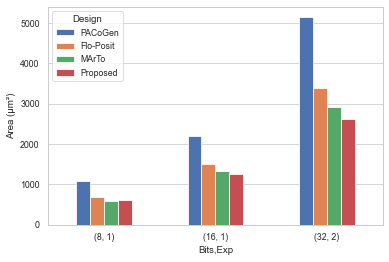

In [7]:
area_df.plot.bar(
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)"
)
            
plt.grid(False, axis="x")
plt.show()

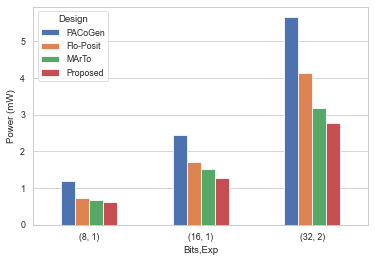

In [8]:
power_df.plot.bar(
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)"
)

plt.grid(False, axis="x")
plt.show()

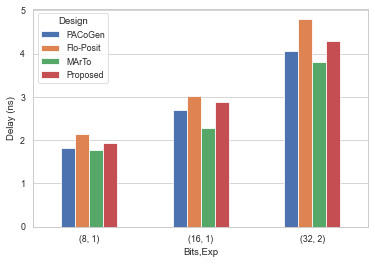

In [9]:
delay_df.plot.bar(
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)"
)

plt.grid(False, axis="x")
plt.show()

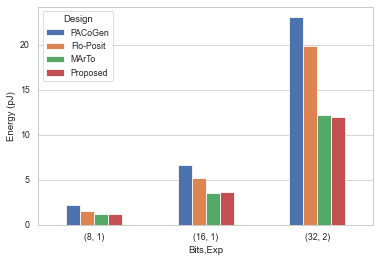

In [10]:
energy_df.plot.bar(
                 y="Energy",
                 rot = 0,
                 ylabel="Energy (pJ)"
)

plt.grid(False, axis="x")
plt.show()

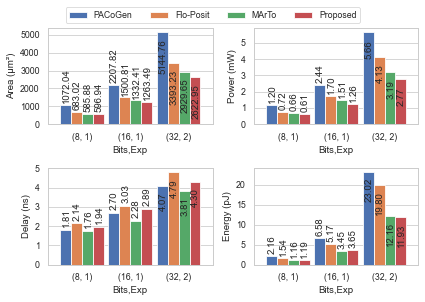

In [11]:
fig, axs = plt.subplots(2, 2)
# fig, axs = plt.subplots(2, 2, figsize=(10,6))
# fig, axs = plt.subplots(2, 2, figsize=(15,8))

area_df.plot.bar(ax=axs[0,0], legend=False,
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)",
                 width=0.9
)
axs[0,0].grid(False, axis="x")
axs[0,0].set_yticks(np.arange(0,6000,1000))
# Display values
for i, v in enumerate(area_df.values.flatten()):
    axs[0,0].text((i//4)-0.415+(i%4)*0.225 , (v+200 if v < 2500 else v-2200),
            str('%.2f' % v), rotation=90,
            #color='k', fontweight='bold'
            )

power_df.plot.bar(ax=axs[0,1], legend=False,
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)",
                 width=0.9
)
axs[0,1].grid(False, axis="x")
axs[0,1].set_yticks(np.arange(0,6,1))
# Display values
for i, v in enumerate(power_df.values.flatten()):
    axs[0,1].text((i//4)-0.415+(i%4)*0.225 , (v+0.25 if v < 2.5 else v-1.5),
            str('%.2f' % v), rotation=90,
            #color='k', fontweight='bold'
            )

delay_df.plot.bar(ax=axs[1,0], legend=False,
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)",
                 width=0.9
)
axs[1,0].grid(False, axis="x")
axs[1,0].set_yticks(np.arange(0,6,1))
# Display values
for i, v in enumerate(delay_df.values.flatten()):
    axs[1,0].text((i//4)-0.415+(i%4)*0.225 , (v+0.25 if i < 8 else v-1.2),
            str('%.2f' % v), rotation=90,
            #color='k', fontweight='bold'
            )

energy_df.plot.bar(ax=axs[1,1], legend=False,
                 y="Energy",
                 rot = 0,
                #  logy="sym",
                 ylabel="Energy (pJ)",
                 width=0.9
)
axs[1,1].grid(False, axis="x")
# Display values
for i, v in enumerate(energy_df.values.flatten()):
    axs[1,1].text((i//4)-0.415+(i%4)*0.225 , (v+1 if i < 8 else v-7),
            str('%.2f' % v), rotation=90,
            #color='k', fontweight='bold'
            )

# plt.legend(loc="upper left")
axLine, axLabel = axs[1,1].get_legend_handles_labels()
fig.legend(axLine, axLabel,           
           loc = 'upper center',
           ncol=4,
           bbox_to_anchor=(0.5, 1.05)
           )

# fig.suptitle("Posit Adder synthesis")
fig.tight_layout()

plt.savefig("figs/adder.pdf", bbox_inches="tight")
plt.show()

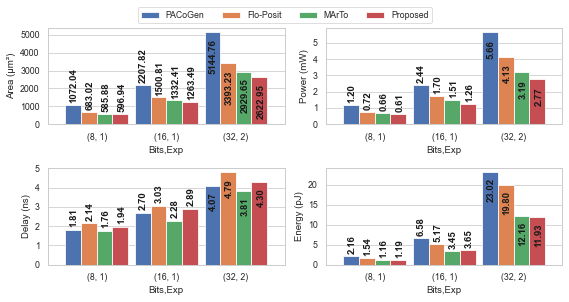

In [12]:
# fig, axs = plt.subplots(2, 2)
fig, axs = plt.subplots(2, 2, figsize=(8,4))
# fig, axs = plt.subplots(2, 2, figsize=(15,8))

area_df.plot.bar(ax=axs[0,0], legend=False,
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)",
                 width=0.9
)
axs[0,0].grid(False, axis="x")
axs[0,0].set_yticks(np.arange(0,6000,1000))
# Display values
for i, v in enumerate(area_df.values.flatten()):
    axs[0,0].text((i//4)-0.39+(i%4)*0.23 , (v+200 if v < 2500 else v-2200),
            str('%.2f' % v), rotation=90,
            color='k', fontweight='bold'
            )

power_df.plot.bar(ax=axs[0,1], legend=False,
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)",
                 width=0.9
)
axs[0,1].grid(False, axis="x")
axs[0,1].set_yticks(np.arange(0,6,1))
# Display values
for i, v in enumerate(power_df.values.flatten()):
    axs[0,1].text((i//4)-0.39+(i%4)*0.23 , (v+0.25 if v < 2.5 else v-1.5),
            str('%.2f' % v), rotation=90,
            color='k', fontweight='bold'
            )

delay_df.plot.bar(ax=axs[1,0], legend=False,
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)",
                 width=0.9
)
axs[1,0].grid(False, axis="x")
axs[1,0].set_yticks(np.arange(0,6,1))
# Display values
for i, v in enumerate(delay_df.values.flatten()):
    axs[1,0].text((i//4)-0.39+(i%4)*0.23 , (v+0.25 if i < 8 else v-1.2),
            str('%.2f' % v), rotation=90,
            color='k', fontweight='bold'
            )

energy_df.plot.bar(ax=axs[1,1], legend=False,
                 y="Energy",
                 rot = 0,
                #  logy="sym",
                 ylabel="Energy (pJ)",
                 width=0.9
)
axs[1,1].grid(False, axis="x")
# Display values
for i, v in enumerate(energy_df.values.flatten()):
    axs[1,1].text((i//4)-0.39+(i%4)*0.23 , (v+1 if i < 8 else v-7),
            str('%.2f' % v), rotation=90,
            color='k', fontweight='bold'
            )

# plt.legend(loc="upper left")
axLine, axLabel = axs[1,1].get_legend_handles_labels()
fig.legend(axLine, axLabel,           
           loc = 'upper center',
           ncol=4,
           bbox_to_anchor=(0.5, 1.05)
           )

# fig.suptitle("Posit Adder synthesis")
fig.tight_layout()

plt.savefig("figs/adder.png", bbox_inches="tight", dpi=200)
plt.show()

## Multiplication

In [13]:
mult_df = pd.read_json("Multiplication/synopsys_results.json")
mult_df = mult_df[(mult_df['Exp']==1) | (mult_df['Bits']==32)]
mult_df.head()

,Design,Bits,Exp,Area,Power,Delay,Energy
0,PACoGen,8,1,1154.596807,1.4514,1.55,2.249670
2,PACoGen,16,1,3355.128017,5.0461,2.53,12.766633
4,PACoGen,32,2,10309.992072,18.3376,4.47,81.969072
5,Flo-Posit,8,1,616.224003,0.7376,1.47,1.084272
7,Flo-Posit,16,1,2250.628813,3.5270,2.74,9.663980


In [14]:
area_df = mult_df[["Area", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)
power_df = mult_df[["Power", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)
delay_df = mult_df[["Delay", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)
energy_df = mult_df[["Energy", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)

area_df.head()

Area                                       
Design         PACoGen    Flo-Posit        MArTo     Proposed
Bits Exp                                                     
8    1     1154.596807   616.224003   615.753601   585.412802
16   1     3355.128017  2250.628813  2170.896009  2070.700813
32   2    10309.992072  8132.980841  7690.334447  7468.305652

In [15]:
area_gain = (area_df['Area']['Flo-Posit'].values - area_df['Area']['Proposed'].values) / area_df['Area']['Flo-Posit'].values
power_gain = (power_df['Power']['Flo-Posit'].values - power_df['Power']['Proposed'].values) / power_df['Power']['Flo-Posit'].values
delay_gain = (delay_df['Delay']['Flo-Posit'].values - delay_df['Delay']['Proposed'].values) / delay_df['Delay']['Flo-Posit'].values
energy_gain = (energy_df['Energy']['Flo-Posit'].values - energy_df['Energy']['Proposed'].values) / energy_df['Energy']['Flo-Posit'].values


print(area_gain)
print(power_gain)
print(delay_gain)
print(energy_gain)

[0.05       0.07994566 0.0817259 ]
[-0.07266811  0.04213212  0.07722673]
[0.25170068 0.24452555 0.2154195 ]
[0.19732318 0.27635529 0.27601009]


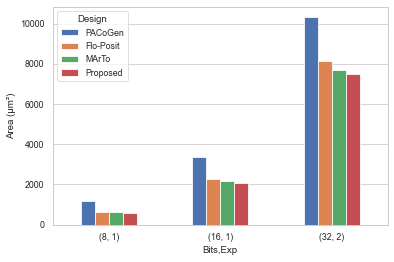

In [16]:
area_df.plot.bar(
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)"
)

plt.grid(False, axis="x")
plt.show()

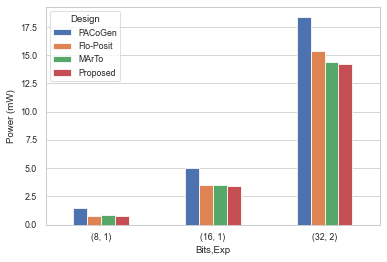

In [17]:
power_df.plot.bar(
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)"
)

plt.grid(False, axis="x")
plt.show()

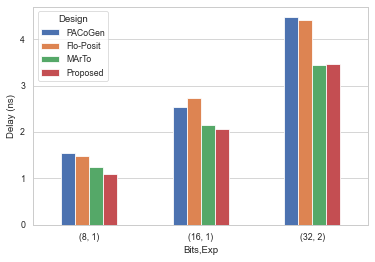

In [18]:
delay_df.plot.bar(
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)"
)

plt.grid(False, axis="x")
plt.show()

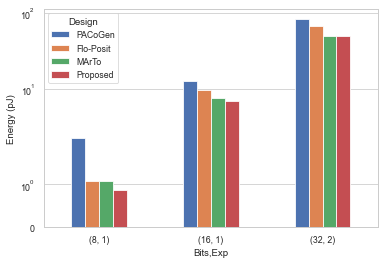

In [19]:
energy_df.plot.bar(
                 y="Energy",
                 rot = 0,
                 logy="sym",
                 ylabel="Energy (pJ)"
)

plt.grid(False, axis="x")
plt.show()

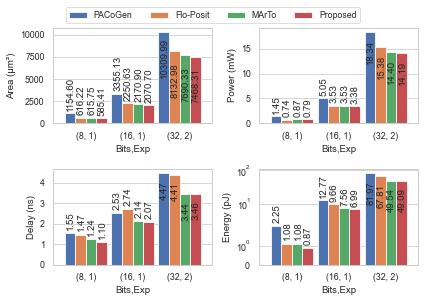

In [20]:
fig, axs = plt.subplots(2, 2)
# fig, axs = plt.subplots(2, 2, figsize=(10,6))
# fig, axs = plt.subplots(2, 2, figsize=(15,8))

area_df.plot.bar(ax=axs[0,0], legend=False,
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)",
                 width=0.9
)
axs[0,0].grid(False, axis="x")
# axs[0,0].set_yticks(np.arange(0,12000,2000))
# Display values
for i, v in enumerate(area_df.values.flatten()):
    axs[0,0].text((i//4)-0.415+(i%4)*0.225 , (v+500 if v < 5000 else v-5000),
            str('%.2f' % v), rotation=90,
            #color='k', fontweight='bold'
            )

power_df.plot.bar(ax=axs[0,1], legend=False,
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)",
                 width=0.9
)
axs[0,1].grid(False, axis="x")
# Display values
for i, v in enumerate(power_df.values.flatten()):
    axs[0,1].text((i//4)-0.415+(i%4)*0.225 , (v+0.9 if i < 8 else v-6),
            str('%.2f' % v), rotation=90,
            #color='k', fontweight='bold'
            )

delay_df.plot.bar(ax=axs[1,0], legend=False,
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)",
                 width=0.9
)
axs[1,0].grid(False, axis="x")
# Display values
for i, v in enumerate(delay_df.values.flatten()):
    axs[1,0].text((i//4)-0.415+(i%4)*0.225 , (v+0.25 if i < 8 else v-1.2),
            str('%.2f' % v), rotation=90,
            #color='k', fontweight='bold'
            )

energy_df.plot.bar(ax=axs[1,1], legend=False,
                 y="Energy",
                 rot = 0,
                 logy="sym",
                 ylabel="Energy (pJ)",
                 width=0.9
)
axs[1,1].grid(False, axis="x")
# Display values
for i, v in enumerate(energy_df.values.flatten()):
    axs[1,1].text((i//4)-0.415+(i%4)*0.225 , (v+v/3 if i < 8 else v-v/1.15),
            str('%.2f' % v), rotation=90,
            #color='k', fontweight='bold'
            )

# plt.legend(loc="upper left")
axLine, axLabel = axs[1,1].get_legend_handles_labels()
fig.legend(axLine, axLabel,           
           loc = 'upper center',
           ncol=4,
           bbox_to_anchor=(0.5, 1.05)
           )

# fig.suptitle("Posit Multiplier synthesis")
fig.tight_layout()

plt.savefig("figs/mult.pdf", bbox_inches="tight")
plt.show()

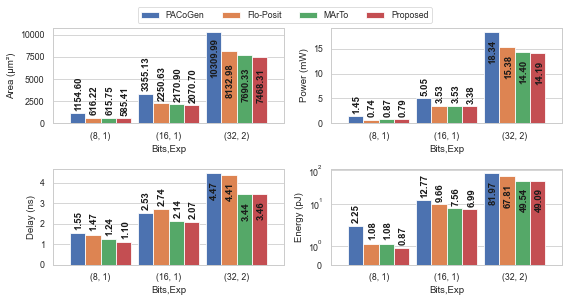

In [21]:
# fig, axs = plt.subplots(2, 2)
fig, axs = plt.subplots(2, 2, figsize=(8,4))
# fig, axs = plt.subplots(2, 2, figsize=(15,8))

area_df.plot.bar(ax=axs[0,0], legend=False,
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)",
                 width=0.9
)
axs[0,0].grid(False, axis="x")
# axs[0,0].set_yticks(np.arange(0,12000,2000))
# Display values
for i, v in enumerate(area_df.values.flatten()):
    axs[0,0].text((i//4)-0.39+(i%4)*0.23 , (v+500 if v < 5000 else v-5000),
            str('%.2f' % v), rotation=90,
            color='k', fontweight='bold'
            )

power_df.plot.bar(ax=axs[0,1], legend=False,
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)",
                 width=0.9
)
axs[0,1].grid(False, axis="x")
# Display values
for i, v in enumerate(power_df.values.flatten()):
    axs[0,1].text((i//4)-0.39+(i%4)*0.23 , (v+0.9 if i < 8 else v-6),
            str('%.2f' % v), rotation=90,
            color='k', fontweight='bold'
            )

delay_df.plot.bar(ax=axs[1,0], legend=False,
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)",
                 width=0.9
)
axs[1,0].grid(False, axis="x")
# Display values
for i, v in enumerate(delay_df.values.flatten()):
    axs[1,0].text((i//4)-0.39+(i%4)*0.23 , (v+0.25 if i < 8 else v-1.2),
            str('%.2f' % v), rotation=90,
            color='k', fontweight='bold'
            )

energy_df.plot.bar(ax=axs[1,1], legend=False,
                 y="Energy",
                 rot = 0,
                 logy="sym",
                 ylabel="Energy (pJ)",
                 width=0.9
)
axs[1,1].grid(False, axis="x")
# Display values
for i, v in enumerate(energy_df.values.flatten()):
    axs[1,1].text((i//4)-0.39+(i%4)*0.23 , (v+v/3 if i < 8 else v-v/1.15),
            str('%.2f' % v), rotation=90,
            color='k', fontweight='bold'
            )

# plt.legend(loc="upper left")
axLine, axLabel = axs[1,1].get_legend_handles_labels()
fig.legend(axLine, axLabel,           
           loc = 'upper center',
           ncol=4,
           bbox_to_anchor=(0.5, 1.05)
           )

# fig.suptitle("Posit Multiplier synthesis")
fig.tight_layout()

plt.savefig("figs/mult.png", bbox_inches="tight", dpi=200)
plt.show()

## Single component comparison

In [22]:
my_color_palette = ["#246799", "#ffa600", "#df5fa1"]

In [23]:
components_df = pd.read_json("Misc/synopsys_results.json")
components_df.head()

,Component,Design,Area,Power,Delay,Energy
0,Decoder,Old,591.057600,0.589600,1.47,0.866712
1,Decoder,New,392.078402,0.268700,0.88,0.236456
2,Decoder,IEEE,85.142401,0.042387,0.16,0.006782
3,Encoder,Old,843.662399,0.817200,1.14,0.931608
4,Encoder,New,564.244803,0.512000,0.93,0.476160


In [24]:
decoder_df = components_df[components_df["Component"]=="Decoder"].groupby(["Design"], sort=False).sum().T
encoder_df = components_df[components_df["Component"]=="Encoder"].groupby(["Design"], sort=False).sum().T
adder_df = components_df[components_df["Component"]=="Adder"].groupby(["Design"], sort=False).sum().T
multiplier_df = components_df[components_df["Component"]=="Multiplier"].groupby(["Design"], sort=False).sum().T

In [25]:
# Normalize results with respect Old decoding format
# designs = ["New", "Old"]
for d in ["IEEE", "New", "Old"]:
    decoder_df[d] /= decoder_df["Old"]
    encoder_df[d] /= encoder_df["Old"]
for d in ["New", "Old"]:
    adder_df[d] /= adder_df["Old"]
    multiplier_df[d] /= multiplier_df["Old"]

In [26]:
decoder_df


Design,Old,New,IEEE
Area,1.0,0.663351,0.144051
Power,1.0,0.455733,0.071891
Delay,1.0,0.598639,0.108844
Energy,1.0,0.272820,0.007825


In [27]:
encoder_df

Design,Old,New,IEEE
Area,1.0,0.668804,0.100084
Power,1.0,0.626530,0.049766
Delay,1.0,0.815789,0.228070
Energy,1.0,0.511116,0.011350


In [28]:
adder_df

Design,Old,New
Area,1.0,0.918319
Power,1.0,0.861560
Delay,1.0,0.847458
Energy,1.0,0.730135


In [29]:
multiplier_df

Design,Old,New
Area,1.0,1.073822
Power,1.0,1.078652
Delay,1.0,0.977273
Energy,1.0,1.054137


/tmp/ipykernel_557280/1211876248.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ax = decoder_df.drop("IEEE", 1).plot.bar(


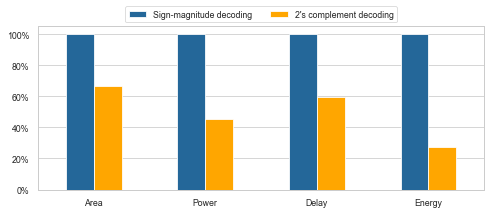

In [30]:
ax = decoder_df.drop("IEEE", 1).plot.bar(
                 rot = 0,
                #  ylabel="Relative resource utilization",
                 color=my_color_palette,
                 figsize=(8,3),
                #  title="Decoder component"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.legend(loc = 'center right',bbox_to_anchor=(1.2, 0.5))
plt.legend(["Sign-magnitude decoding", "2's complement decoding"],
           loc = 'upper center',
           ncol=2,
           bbox_to_anchor=(0.5, 1.15)
           )
plt.grid(False, axis="x")
plt.savefig("figs/decoder_cmp.pdf", bbox_inches="tight")
plt.savefig("figs/decoder_cmp.png", bbox_inches="tight", dpi=200)
plt.show()

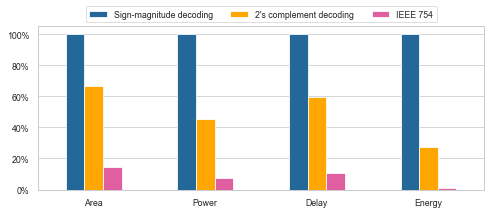

In [31]:
ax = decoder_df.plot.bar(
                 rot = 0,
                #  ylabel="Relative resource utilization",
                 color=my_color_palette,
                 figsize=(8,3),
                #  title="Decoder component"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.legend(loc = 'center right',bbox_to_anchor=(1.2, 0.5))
plt.legend(["Sign-magnitude decoding", "2's complement decoding", "IEEE 754"],
           loc = 'upper center',
           ncol=3,
           bbox_to_anchor=(0.5, 1.15)
           )
plt.grid(False, axis="x")
plt.savefig("figs/decoder_IEEE_cmp.png", bbox_inches="tight", dpi=200)
plt.show()

/tmp/ipykernel_557280/2725045927.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ax = encoder_df.drop("IEEE", 1).plot.bar(


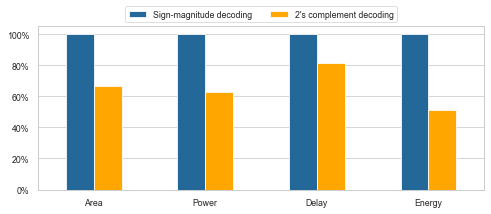

In [32]:
ax = encoder_df.drop("IEEE", 1).plot.bar(
                 rot = 0,
                #  ylabel="Relative resource utilization",
                 color=my_color_palette,
                 figsize=(8,3),
                #  title="Encoder component"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.legend(loc = 'center right',bbox_to_anchor=(1.2, 0.5))
plt.legend(["Sign-magnitude decoding", "2's complement decoding"],
           loc = 'upper center',
           ncol=2,
           bbox_to_anchor=(0.5, 1.15)
           )
plt.grid(False, axis="x")
plt.savefig("figs/encoder_cmp.pdf", bbox_inches="tight")
plt.savefig("figs/encoder_cmp.png", bbox_inches="tight", dpi=200)
plt.show()

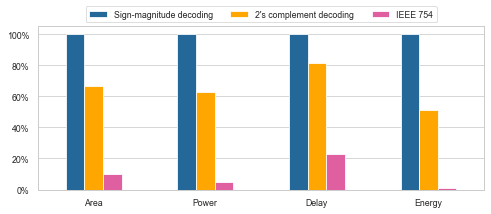

In [33]:
ax = encoder_df.plot.bar(
                 rot = 0,
                #  ylabel="Relative resource utilization",
                 color=my_color_palette,
                 figsize=(8,3),
                #  title="Encoder component"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.legend(loc = 'center right',bbox_to_anchor=(1.2, 0.5))
plt.legend(["Sign-magnitude decoding", "2's complement decoding", "IEEE 754"],
           loc = 'upper center',
           ncol=3,
           bbox_to_anchor=(0.5, 1.15)
           )
plt.grid(False, axis="x")
plt.savefig("figs/encoder_IEEE_cmp.png", bbox_inches="tight", dpi=200)
plt.show()

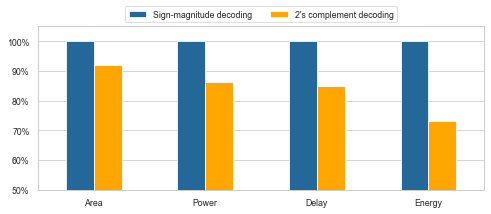

In [34]:
ax = adder_df.plot.bar(
                 rot = 0,
                #  ylabel="Relative resource utilization",
                 color=my_color_palette,
                 figsize=(8,3),
                #  title="Adder component"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(0.50, 1.05)
# plt.legend(loc = 'center right',bbox_to_anchor=(1.2, 0.5))
plt.legend(["Sign-magnitude decoding", "2's complement decoding"],
           loc = 'upper center',
           ncol=2,
           bbox_to_anchor=(0.5, 1.15)
           )
plt.grid(False, axis="x")
plt.savefig("figs/adder_cmp.pdf", bbox_inches="tight")
plt.savefig("figs/adder_cmp.png", bbox_inches="tight", dpi=200)
plt.show()

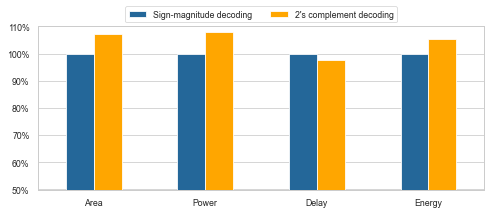

In [35]:
ax = multiplier_df.plot.bar(
                 rot = 0,
                #  ylabel="Relative resource utilization",
                 color=my_color_palette,
                 figsize=(8,3),
                #  title="Multiplier component"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(0.50, 1.1)
# plt.legend(loc = 'center right',bbox_to_anchor=(1.2, 0.5))
plt.legend(["Sign-magnitude decoding", "2's complement decoding"],
           loc = 'upper center',
           ncol=2,
           bbox_to_anchor=(0.5, 1.15)
           )
plt.grid(False, axis="x")
plt.savefig("figs/multiplier_cmp.pdf", bbox_inches="tight")
plt.savefig("figs/multiplier_cmp.png", bbox_inches="tight", dpi=200)
plt.show()